In [ ]:
import numpy as np
import cv2
import sys
import tensorflow as tf


PATH_TO_CKPT = 'models/hand_graph.pb'
PATH_TO_LABELS = os.path.join('models/hand_label_map.pbtxt')
hand_movement_thresh=40
hand_score_thresh=0.35
num_hands_detect=1
PRE_RESOLUTION=(180,320)

def load_inference_graph():
    detection_graph = tf.Graph()
    with detection_graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
        sess = tf.Session(graph=detection_graph)
    return detection_graph, sess


# Actual detection .. generate scores and bounding boxes given an image
def detect_objects(image_np, detection_graph, sess):
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name(
        'detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name(
        'detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name(
        'detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name(
        'num_detections:0')

    image_np_expanded = np.expand_dims(image_np, axis=0)

    (boxes, scores, classes, num) = sess.run(
        [detection_boxes, detection_scores,
            detection_classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})
    return np.squeeze(boxes), np.squeeze(scores)

def worker_hands(input_q, output_q):
    detection_graph, sess = load_inference_graph()
    sess = tf.Session(graph=detection_graph)
    while True:
        frame = input_q.get()
        if frame is not None:
            boxes, scores = detect_objects(
                frame, detection_graph, sess)
            output_q.put((boxes, scores))
        else:
            output_q.put((boxes, scores))
    sess.close()
    
def draw_box_on_image(num_hands_detect, score_thresh, scores, boxes, im_width, im_height, image_np):
    for i in range(num_hands_detect):
        if (scores[i] > score_thresh):
            (left, right, top, bottom) = (boxes[i][1] * im_width, boxes[i][3] * im_width,
                                          boxes[i][0] * im_height, boxes[i][2] * im_height)
            p1 = (int(left), int(top))
            p2 = (int(right), int(bottom))
            cv2.rectangle(image_np, p1, p2, (77, 255, 9), 3, 1)
            
            


ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

ImportError: numpy.core.multiarray failed to import

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

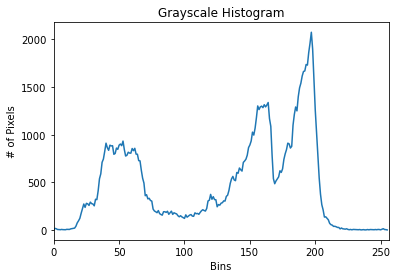

In [12]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import cv2

# load the image and show it
image = cv2.imread('img/5.jpg')


# convert the image to grayscale and create a histogram
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

cv2.imshow("image", image)

cv2.imshow("gray", gray)


cv2.waitKey()
cv2.destroyAllWindows()

2D histogram shape: (32, 32), with 1024 values


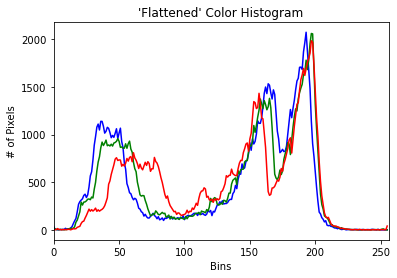

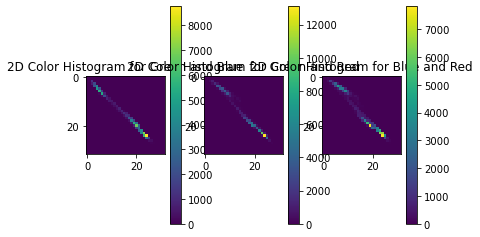

In [11]:
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()

plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	features.extend(hist)
	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([0, 256])


# let's move on to 2D histograms -- I am reducing the
# number of bins in the histogram from 256 to 32 so we
# can better visualize the results
fig = plt.figure()
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Blue")
plt.colorbar(p)
# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Red")
plt.colorbar(p)
# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Blue and Red")
plt.colorbar(p)
# finally, let's examine the dimensionality of one of
# the 2D histograms
print("2D histogram shape: %s, with %d values" % (
	hist.shape, hist.flatten().shape[0]))

In [29]:
import imutils
import numpy as np
import cv2

image = cv2.imread('img/1.jpg') #hand2
image=cv2.resize(image,(500,500))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresh = cv2.bitwise_not(gray)
thresh[thresh > 150] = 255
#thresh[thresh <= 10] = 0
cv2.imshow("gray", thresh)


cv2.waitKey()
cv2.destroyAllWindows()

In [31]:

outline = np.zeros(image.shape, dtype = "uint8")
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
cv2.drawContours(outline, [cnts], -1, 200, -1)

cv2.imshow("outline", outline)
cv2.waitKey()
cv2.destroyAllWindows()